# ICD Project

## Importing libraries

In [145]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
import contractions
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import pos_tag
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.corpora import Dictionary
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/dani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Load Dataset

In [146]:
data = pd.read_csv('icd_scopus.csv')
data

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,NaN,NaN,NaN,International Conference on Applied Research i...,2023,Springer Proceedings in Business and Economics,NaN,NaN,NaN,NaN,...,978-981198484-6,NaN,NaN,English,Springer Proc. Bus. Econ.,Conference review,Final,NaN,Scopus,2-s2.0-85161683590
1,Vargas A.C.; Magnussen R.,"Vargas, Alejandra Celis (57951796800); Magnuss...",57951796800; 55579157200,A Game-based Approach for Open Data in Educati...,2022,Proceedings of the European Conference on Game...,2022-October,NaN,NaN,139,...,978-191458751-1,NaN,NaN,English,Proc. European Conf. Games-based Learn.,Conference paper,Final,NaN,Scopus,2-s2.0-85141152410
2,Fiş Erümit S.; Karakuş Yılmaz T.,"Fiş Erümit, S. (36343307300); Karakuş Yılmaz, ...",36343307300; 24166942000,Gamification Design in Education: What Might G...,2022,"Technology, Knowledge and Learning",27,4,NaN,1039,...,NaN,ICMLF,NaN,English,Tech. Knowl. Learn.,Article,Final,NaN,Scopus,2-s2.0-85128920438
3,Alsamawi F.N.; Kurnaz S.,"Alsamawi, Farazdaq Nahedh (57224682003); Kurna...",57224682003; 57203640255,A framework for adopting gamified learning sys...,2023,Applied Nanoscience (Switzerland),13,2,NaN,1135,...,NaN,NaN,NaN,English,Appl. Nanosci. (Switzerland),Article,Final,All Open Access; Bronze Open Access; Green Ope...,Scopus,2-s2.0-85108164717
4,Karnalim O.; Simon; Chivers W.,"Karnalim, Oscar (57191242240); Simon (74097108...",57191242240; 7409710825; 6505969230,Non-game Incentives in Gamified Programming Ed...,2023,Lecture Notes in Networks and Systems,633 LNNS,NaN,NaN,910,...,978-303126875-5,NaN,NaN,English,Lect. Notes Networks Syst.,Conference paper,Final,NaN,Scopus,2-s2.0-85151127571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Unkelos-Shpigel N.,"Unkelos-Shpigel, Naomi (55786671200)",55786671200,Peel the onion: Use of collaborative and gamif...,2016,Lecture Notes in Business Information Processing,249,NaN,NaN,122,...,978-331939563-0,NaN,NaN,English,Lect. Notes Bus. Inf. Process.,Conference paper,Final,NaN,Scopus,2-s2.0-84976621686
378,Chou C.C.; He S.-J.; Olsen J.,"Chou, Chientzu Candace (56900344000); He, Shi-...",56900344000; 57190391124; 57200244427,The impact of badges on course participation a...,2015,Workshop Proceedings of the 23rd International...,NaN,NaN,NaN,333,...,978-499080147-2,NaN,NaN,English,"Workshop Proc. Int. Conf. Comput. Educ., ICCE",Conference paper,Final,NaN,Scopus,2-s2.0-85040455534
379,Zarzycki A.,"Zarzycki, Andrzej (33668016500)",33668016500,Teaching and Designing for Augmented Reality,2014,Proceedings of the International Conference on...,1,NaN,NaN,357,...,978-949120707-5,NaN,NaN,English,Proc. Int. Conf. Educ. Res. Comput. Aided. Arc...,Conference paper,Final,NaN,Scopus,2-s2.0-85006776989
380,Arias Aranda D.; Bustinza Sánchez O.F.; Djundu...,"Arias Aranda, Daniel (7801374665); Bustinza Sá...",7801374665; 35791444600; 57016876400,Effects of gamified business simulations on en...,2016,Revista de Educacion,2016,371,NaN,126,...,NaN,NaN,NaN,English,Revista Educ.,Article,Final,NaN,Scopus,2-s2.0-84951275541


## Basic Text pre-processing

### Checking for duplicate values

In [147]:
data.duplicated().sum()

0

Zero duplicated values, so there's no need to try to remove them.

### Cheking for null values


In [148]:
# Checking for missing values
data.isna().sum()

Authors                           18
Author full names                 18
Author(s) ID                      18
Title                              0
Year                               0
Source title                       0
Volume                           103
Issue                            223
Art. No.                         296
Page start                       108
Page end                         112
Page count                        98
Cited by                           0
DOI                               74
Link                               0
Affiliations                      20
Authors with affiliations         20
Abstract                           0
Author Keywords                   41
Index Keywords                   150
Molecular Sequence Numbers       382
Chemicals/CAS                    378
Tradenames                       381
Manufacturers                    382
Funding Details                  278
Funding Texts                    280
References                        24
C

### Remove useless columns in the context and columns with NaN values

In [199]:
columns_to_drop = ['Author(s) ID', 'Author full names', 'Volume', 'Issue', 'Art. No.', 'Funding Details', 'Conference code', 'Conference location', 'Conference name', 'Conference date', 'Funding Texts', 'Editors', 'Open Access', 'Page start', 'Page end', 'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Sponsors', 'Molecular Sequence Numbers', 'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'ISBN', 'CODEN', 'PubMed ID']

droped_data = data.drop(columns=columns_to_drop)
droped_data

,Authors,Title,Year,Source title,Abstract,Author Keywords,Index Keywords,References,Correspondence Address,Publisher,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Source,EID
0,NaN,International Conference on Applied Research i...,2023,Springer Proceedings in Business and Economics,The proceedings contain 22 papers. The special...,NaN,NaN,NaN,NaN,Springer Nature,21987246,English,Springer Proc. Bus. Econ.,Conference review,Final,Scopus,2-s2.0-85161683590
1,Vargas A.C.; Magnussen R.,A Game-based Approach for Open Data in Educati...,2022,Proceedings of the European Conference on Game...,Open Data is defined as digital data that is m...,Education; Game-based learning; Open Data; Rea...,Iterative methods; Mapping; Students; Digital ...,"Atenas J., Havemann L., Priego E., Open Data a...",NaN,Dechema e.V.,20490992,English,Proc. European Conf. Games-based Learn.,Conference paper,Final,Scopus,2-s2.0-85141152410
2,Fiş Erümit S.; Karakuş Yılmaz T.,Gamification Design in Education: What Might G...,2022,"Technology, Knowledge and Learning",The purpose of this study was to propose desig...,Game Mechanics and Dynamics; Gamification Desi...,Curricula; Game design; Motivation; Design ele...,"Baxter R.J., Holderness D.K., Wood D.A., Apply...",S. Fiş Erümit; Distance Education Application ...,Springer Science and Business Media B.V.,22111662,English,Tech. Knowl. Learn.,Article,Final,Scopus,2-s2.0-85128920438
3,Alsamawi F.N.; Kurnaz S.,A framework for adopting gamified learning sys...,2023,Applied Nanoscience (Switzerland),The outbreak of COVID 19 has increased the anx...,Games; Gamification; Gamified learning system;...,Decision making; Developing countries; Human r...,"Adnan N., Nordin S.M., Rasli A.M., A possible ...",F.N. Alsamawi; Department of Electrical and Co...,Springer Science and Business Media Deutschlan...,21905509,English,Appl. Nanosci. (Switzerland),Article,Final,Scopus,2-s2.0-85108164717
4,Karnalim O.; Simon; Chivers W.,Non-game Incentives in Gamified Programming Ed...,2023,Lecture Notes in Networks and Systems,"When gamification is used in education, non-ga...",Academic integrity; Gamification; Non-game inc...,Education computing; Intellectual property; Ac...,"Infineon Technologies AG, AN2019-5 “PC and TC ...","O. Karnalim; University of Newcastle, Newcastl...",Springer Science and Business Media Deutschlan...,23673370,English,Lect. Notes Networks Syst.,Conference paper,Final,Scopus,2-s2.0-85151127571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Unkelos-Shpigel N.,Peel the onion: Use of collaborative and gamif...,2016,Lecture Notes in Business Information Processing,As software engineering and information system...,Collaboration; Education; Gamification,Curricula; Education; Education computing; Inf...,"Aberdour M., Achieving quality in open-source ...",N. Unkelos-Shpigel; Information Systems Depart...,Springer Verlag,18651348,English,Lect. Notes Bus. Inf. Process.,Conference paper,Final,Scopus,2-s2.0-84976621686
378,Chou C.C.; He S.-J.; Olsen J.,The impact of badges on course participation a...,2015,Workshop Proceedings of the 23rd International...,Badges have long been used to encourage users ...,Badges; Gamification; Interaction; Online lear...,Computer aided instruction; Computer games; Ed...,"Open Badges for Higher Education, (2013); Allr...",NaN,Asia-Pacific Society for Computers in Education,NaN,English,"Workshop Proc. Int. Conf. Comput. Educ., ICCE",Conference paper,Final,Scopus,2-s2.0-85040455534
379,Zarzycki A.,Teaching and Designing for Augmented Reality,2014,Proceedings of the International Conference on...,This paper discusses ways emerging interactive...,AR; Augmented Reality; Gamification; Mobile Cu...,NaN,"KIM K, SEO B, HAN J, PARK J, Augmented Reality...",A. Zarzycki; New Jersey Institute of Technolog...,Education and research in Computer Aided Archi...,26841843,English,Proc. Int. Conf. Educ. Res. Comput. Aided. Arc...,Conference paper,Fi

### Get duplicates abstract

In [200]:
duplicate = droped_data['Abstract'].duplicated().sum()
duplicate

2

In [201]:
# Remove duplicate rows
df = droped_data.drop_duplicates(subset=['Abstract'])
df.shape

(380, 17)

## **2. Preprocess the dataset**


### Clean up function

In [202]:
def clean_text(text_string, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', text_string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    string = re.sub(r'[^\w\s]', '', string)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    filtered_words = [word for word in string.split() if word not in stopwords.words('english')]

    # Custom stop words list
    customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
                  "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                  "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                  "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

    # Applying custom stop words
    final_words = list(set(filtered_words) - set(customlist))

    # Tokenization
    tokens = word_tokenize(' '.join(final_words))

    # Remove numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    # Fix contractions
    final_string = ' '.join([contractions.fix(word) for word in stemmed_words])

    return final_string

In [203]:
#converts all the values in a specific columns of the DataFrame data to strings 
df["Abstract"] = df["Abstract"].astype(str) 

#Applying a Text Cleaning Function
df['clean_Abstract'] = df['Abstract'].apply(clean_text)

/tmp/ipykernel_35816/3230580561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Abstract"] = df["Abstract"].astype(str)
/tmp/ipykernel_35816/3230580561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_Abstract'] = df['Abstract'].apply(clean_text)


In [204]:
#... aims to create a new DataFrame called selected_columns that contains only the "Title" and "cleanTitle" columns from the original DataFrame df. Then, it displays the first 20 rows of this new DataFrame using the .head(20) method.
selected_columns = df[['Abstract', 'clean_Abstract']]
selected_columns.head(20)

,Abstract,clean_Abstract
0,The proceedings contain 22 papers. The special...,adopt tweet project scientometr appli ownershi...
1,Open Data is defined as digital data that is m...,keyword set studi data develop solv analys cha...
2,The purpose of this study was to propose desig...,follow social set sens motiv mobil found repor...
3,The outbreak of COVID 19 has increased the anx...,expect adopt implic data make analys abdulaziz...
4,"When gamification is used in education, non-ga...",gradeirrelev one better switzerland explor edu...
5,Underachievers - students have poor academic p...,class social questionnair studi develop appli ...
6,Climate change caused by excessive carbon emis...,data survey offer hypothesi cooper emerg could...
7,Despite the exponential success of using creat...,acquisit adopt taught data creativ find studen...
8,"In the era of digital education, it makes sens...",tecnologico make era practic sens higher synch...
9,One of the main problems of Massive Open Onlin...,one open review main element decad last we hav...


/home/dani/Desktop/MCTW-2ANO/ICD/.venv/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/home/dani/Desktop/MCTW-2ANO/ICD/.venv/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


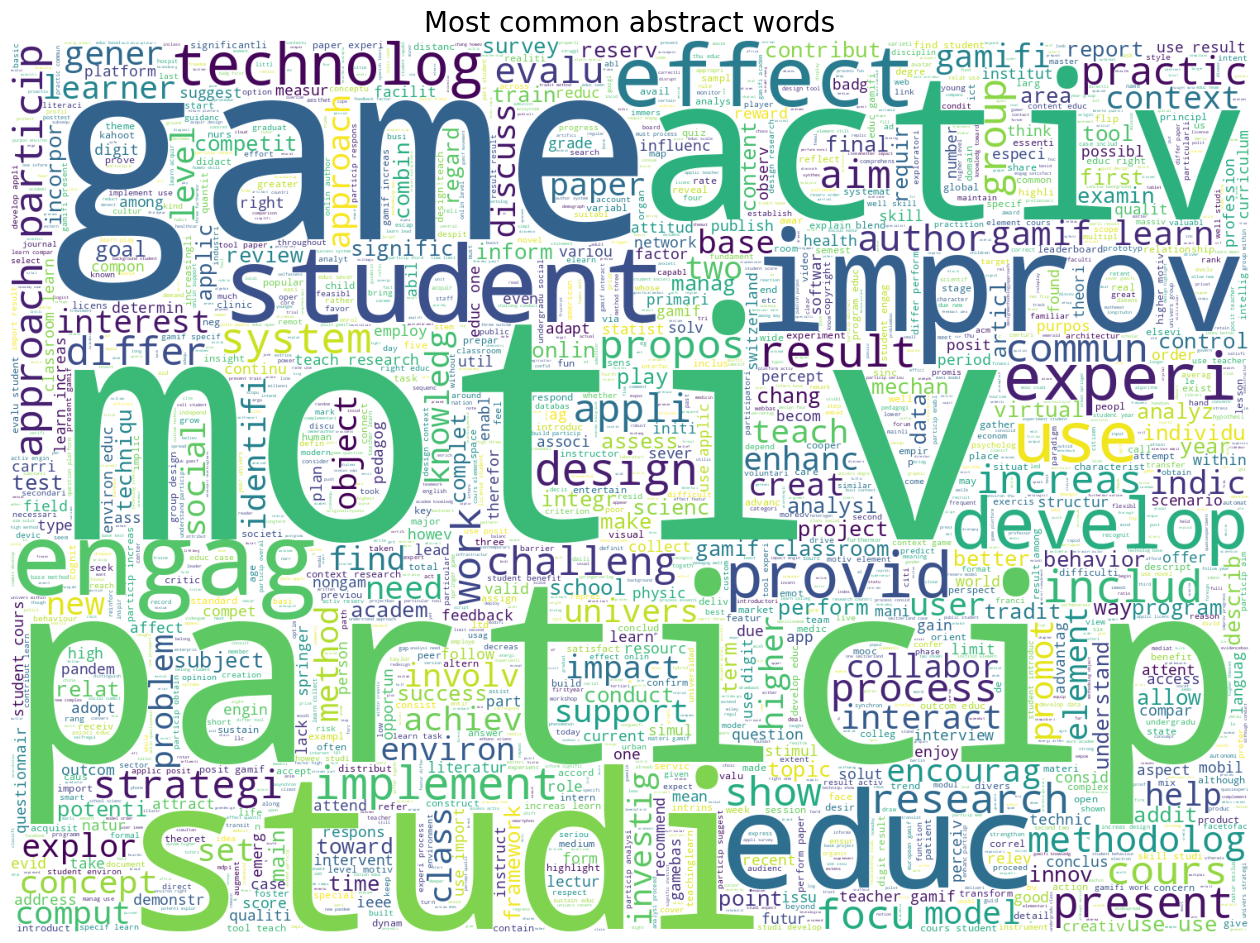

In [205]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='white',max_words = 10000, width=1500, stopwords=STOPWORDS,
                          height=1080).generate(" ".join(df["clean_Abstract"]))
plt.title("Most common abstract words", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

## Representing text

### Bag-Of-Words ou 1 gram

In [206]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'cleanTitle' column
X = vectorizer.fit_transform(df['clean_Abstract'])

# Convert the BoW array into a DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Show the resulting DataFrame
print(bow_df)


     aabb  aalborg  ab  abab  abandon  abandonedvac  abdulaziz  abierto  abil  \
0       0        0   0     0        0             0          0        0     0   
1       0        0   0     0        0             0          0        0     0   
2       0        0   0     0        0             0          0        0     0   
3       0        0   0     0        0             0          1        0     0   
4       0        0   0     0        0             0          0        0     0   
..    ...      ...  ..   ...      ...           ...        ...      ...   ...   
375     0        0   0     0        0             0          0        0     0   
376     0        0   0     0        0             0          0        0     0   
377     0        0   0     0        0             0          0        0     0   
378     0        0   0     0        0             0          0        0     0   
379     0        0   0     0        0             0          0        0     0   

     abl  ...  zaragoza  zh

### N-Grams

In [207]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_Abstract'])


n_grams_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df)

                                               Authors  \
0                                                  NaN   
1                            Vargas A.C.; Magnussen R.   
2                     Fiş Erümit S.; Karakuş Yılmaz T.   
3                             Alsamawi F.N.; Kurnaz S.   
4                       Karnalim O.; Simon; Chivers W.   
..                                                 ...   
377                                 Unkelos-Shpigel N.   
378                      Chou C.C.; He S.-J.; Olsen J.   
379                                        Zarzycki A.   
380  Arias Aranda D.; Bustinza Sánchez O.F.; Djundu...   
381                                           Cronk R.   

                                                 Title  Year  \
0    International Conference on Applied Research i...  2023   
1    A Game-based Approach for Open Data in Educati...  2022   
2    Gamification Design in Education: What Might G...  2022   
3    A framework for adopting gamified learning

*Bar Plot for Most Common N-Grams*

You can use a bar plot to visualize the most common N-grams in the corpus.

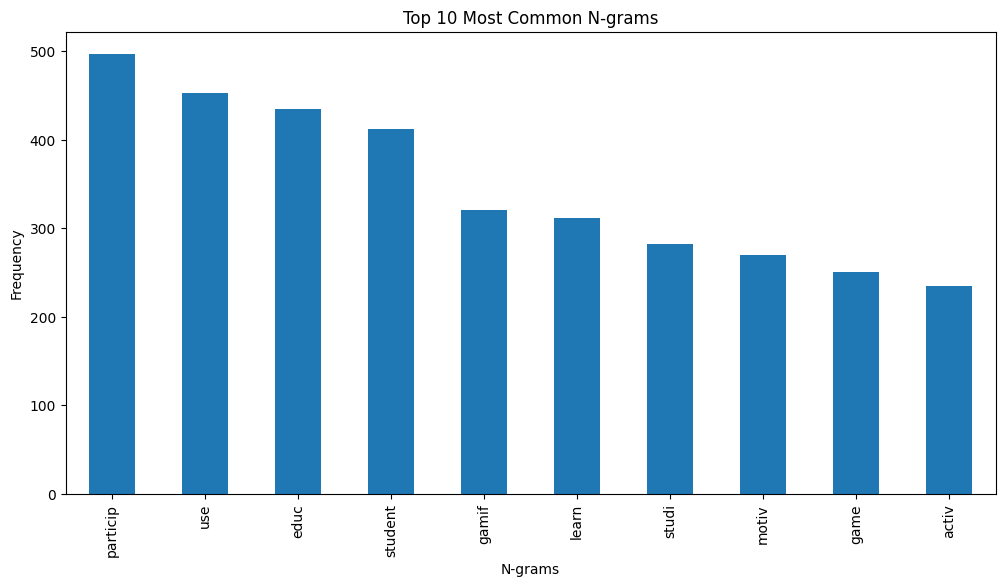

In [208]:
# Sum up the counts of each bigram
sum_bigrams = n_grams_df.sum(axis=0)

# Sort and select top 10 bigrams
sorted_bigrams = sum_bigrams.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_bigrams.plot(kind='bar')
plt.title('Top 10 Most Common N-grams')
plt.xlabel('N-grams')
plt.ylabel('Frequency')
plt.show()


### Term Frequency-Inverse Document Frequency (TF-IDF)

In [209]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned abstracts
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_Abstract'])

# Convert to array and then to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)


     aabb  aalborg   ab  abab  abandon  abandonedvac  abdulaziz  abierto  \
0     0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
1     0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
2     0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
3     0.0      0.0  0.0   0.0      0.0           0.0   0.157102      0.0   
4     0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
..    ...      ...  ...   ...      ...           ...        ...      ...   
375   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
376   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
377   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
378   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
379   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   

     abil  abl  ...  zaragoza  zhang  zhejiang  zimbabw  zoom  zou  zulia  \
0     0.0 

*Bar Plot for Most Common TF-IDF*

You can use a bar plot to visualize the most common TF-IDF in the corpus.

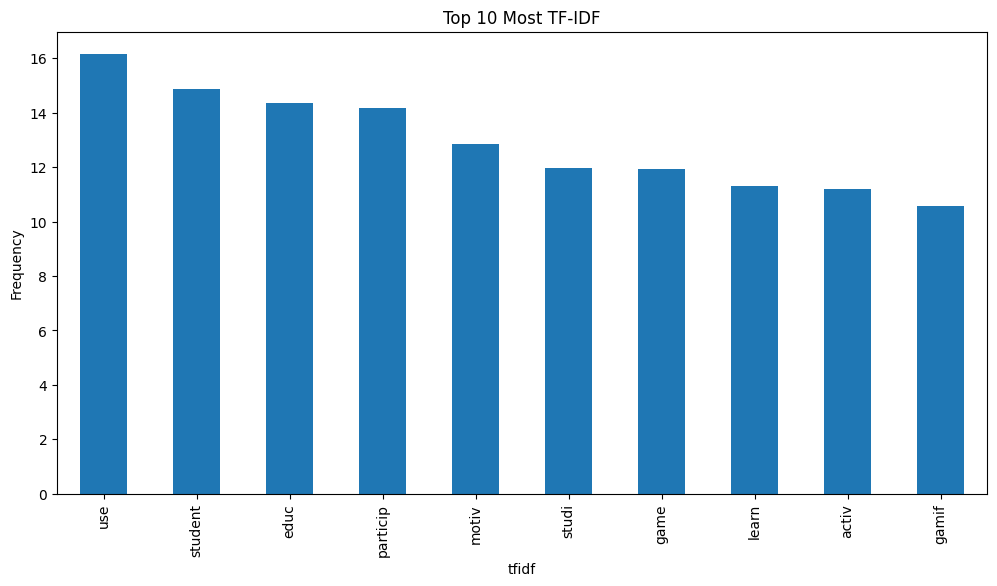

In [210]:
# Sum up the counts of each bigram
sum_tfidf = tfidf_df.sum(axis=0)

# Sort and select top 10 bigrams
sorted_tfidf = sum_tfidf.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_tfidf.plot(kind='bar')
plt.title('Top 10 Most TF-IDF')
plt.xlabel('tfidf')
plt.ylabel('Frequency')
plt.show()


## Part of Speech (POS) Tagging

In [211]:
# Function to tag POS in a sentence
def pos_tag_sentence(sentence):
    tokens = word_tokenize(sentence)
    return pos_tag(tokens)

# Apply POS tagging to each cleaned abstract
df['POS_Tagged_Abstract'] = df['clean_Abstract'].apply(pos_tag_sentence)

# Display the DataFrame
print(df[['clean_Abstract', 'POS_Tagged_Abstract']].head())


                                      clean_Abstract  \
0  adopt tweet project scientometr appli ownershi...   
1  keyword set studi data develop solv analys cha...   
2  follow social set sens motiv mobil found repor...   
3  expect adopt implic data make analys abdulaziz...   
4  gradeirrelev one better switzerland explor edu...   

                                 POS_Tagged_Abstract  
0  [(adopt, JJ), (tweet, NN), (project, NN), (sci...  
1  [(keyword, NN), (set, VBN), (studi, NN), (data...  
2  [(follow, JJ), (social, JJ), (set, NN), (sens,...  
3  [(expect, VB), (adopt, JJ), (implic, JJ), (dat...  
4  [(gradeirrelev, NN), (one, CD), (better, JJR),...  


/tmp/ipykernel_35816/1325037718.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS_Tagged_Abstract'] = df['clean_Abstract'].apply(pos_tag_sentence)


**Frequency Distribution of POS Tags**

Bar chart to show the frequency distribution of different POS tags across all abstracts.

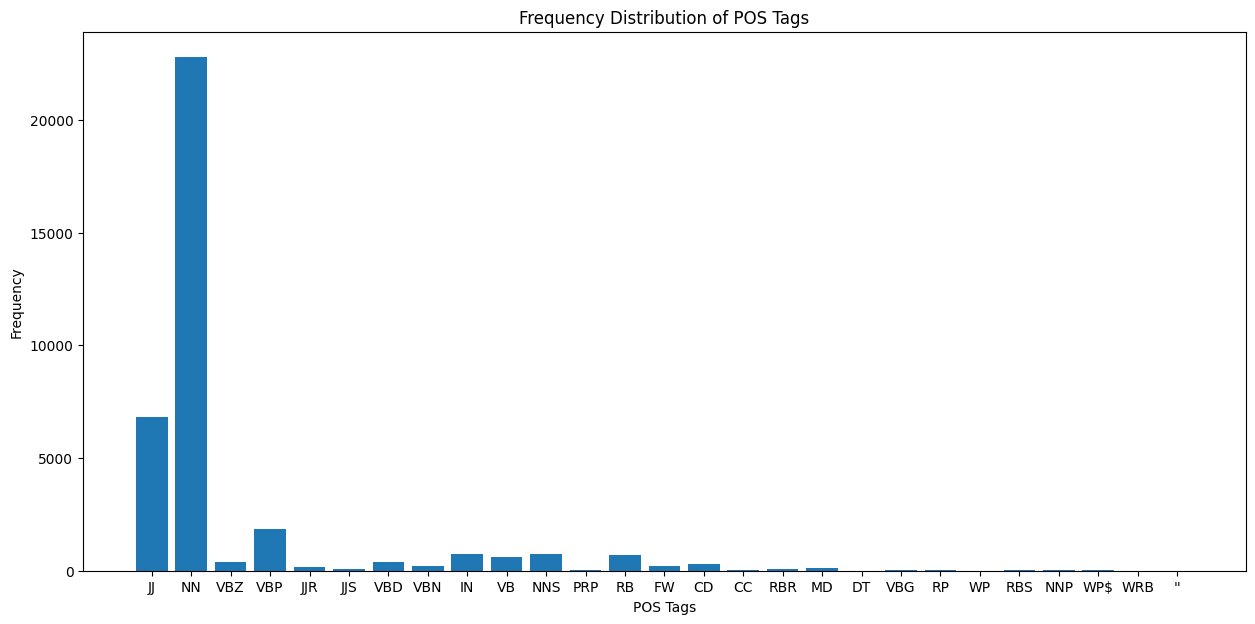

In [212]:
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Flatten the list of all POS tags from all abstracts
all_tags = list(itertools.chain.from_iterable(df['POS_Tagged_Abstract'].apply(lambda x: [tag for word, tag in x])))

# Count the frequency of each POS tag
tag_freq = Counter(all_tags)

# Create a bar chart
plt.figure(figsize=(15, 7))
plt.bar(tag_freq.keys(), tag_freq.values())
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of POS Tags')
plt.show()


**Pie Chart for Overall Tag Distribution**

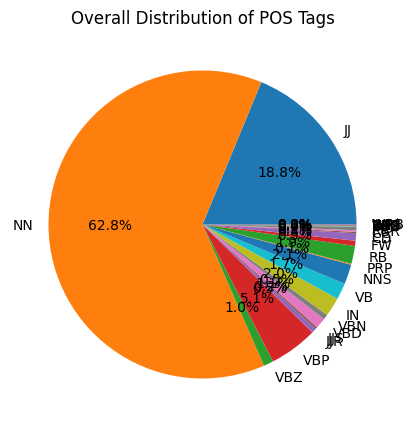

In [213]:
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(tag_freq.values(), labels=tag_freq.keys(), autopct='%1.1f%%')
plt.title('Overall Distribution of POS Tags')
plt.show()


In [214]:
document=df['Abstract']
document

0      The proceedings contain 22 papers. The special...
1      Open Data is defined as digital data that is m...
2      The purpose of this study was to propose desig...
3      The outbreak of COVID 19 has increased the anx...
4      When gamification is used in education, non-ga...
                             ...                        
377    As software engineering and information system...
378    Badges have long been used to encourage users ...
379    This paper discusses ways emerging interactive...
380    Business simulations and Gamification have bee...
381    This paper examines the use of gamification pr...
Name: Abstract, Length: 380, dtype: object

In [215]:
def clean_text(text_string, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', text_string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    string = re.sub(r'[^\w\s]', '', string)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    filtered_words = [word for word in string.split() if word not in stopwords.words('english')]

    # Custom stop words list
    customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
                  "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                  "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                  "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

    # Applying custom stop words
    final_words = list(set(filtered_words) - set(customlist))

    # Tokenization
    tokens = word_tokenize(' '.join(final_words))

    # Remove numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    return stemmed_words

def preprocess_data(documents):
    # Tokenize the documents and remove stopwords
    texts = [[word for word in clean_text(str(doc))] for doc in document]
    
    # Return the list of tokenized and preprocessed texts
    return texts


In [216]:
# Process the documents using the previously defined preprocessing function
processed_texts = preprocess_data(df)
processed_texts

[['adopt',
  'tweet',
  'project',
  'scientometr',
  'appli',
  'ownership',
  'confer',
  'inbound',
  'mind',
  'creativ',
  'perceiv',
  'tourism',
  'student',
  'engag',
  'presid',
  'sme',
  'literatur',
  'market',
  'bank',
  'polic',
  'proceed',
  'programm',
  'vision',
  'understand',
  'countri',
  'particip',
  'suppli',
  'indian',
  'risk',
  'sector',
  'effect',
  'paradigm',
  'sustain',
  'exhaust',
  'incom',
  'fsc',
  'report',
  'chain',
  'higher',
  'transform',
  'nonfinanci',
  'motiv',
  'economi',
  'forest',
  'focu',
  'organiz',
  'certifi',
  'review',
  'climat',
  'manag',
  'improv',
  'firm',
  'tertiari',
  'mediat',
  'enterpris',
  'llp',
  'moder',
  'educ',
  'smooth',
  'paper',
  'justic',
  'effici',
  'femal',
  'mobil',
  'reflect',
  'chang',
  'turnov',
  'corpor',
  'hungari',
  'econom',
  'intent',
  'contain',
  'employe',
  'stakehold',
  'practic',
  'via',
  'creat',
  'intern',
  'develop',
  'base',
  'educationnexu',
  'dona

In [217]:
# Create Dictionary
id2word = corpora.Dictionary(processed_texts)


In [218]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in processed_texts]

In [219]:
# Set number of topics
num_topics = 10

In [220]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, alpha='auto', per_word_topics=True, random_state=42)


In [221]:
# Print the keywords for each topic
print(lda_model.print_topics())

[(0, '0.014*"particip" + 0.011*"educ" + 0.011*"use" + 0.009*"design" + 0.008*"student" + 0.007*"result" + 0.007*"game" + 0.007*"gamif" + 0.006*"develop" + 0.005*"learn"'), (1, '0.016*"use" + 0.012*"educ" + 0.010*"particip" + 0.010*"student" + 0.010*"gamif" + 0.008*"game" + 0.007*"motiv" + 0.007*"activ" + 0.007*"studi" + 0.007*"learn"'), (2, '0.013*"particip" + 0.013*"student" + 0.011*"educ" + 0.011*"studi" + 0.010*"use" + 0.008*"motiv" + 0.007*"learn" + 0.006*"game" + 0.006*"gamif" + 0.006*"activ"'), (3, '0.009*"particip" + 0.009*"use" + 0.008*"educ" + 0.007*"student" + 0.007*"develop" + 0.007*"studi" + 0.006*"motiv" + 0.006*"learn" + 0.006*"gamif" + 0.005*"design"'), (4, '0.009*"particip" + 0.009*"educ" + 0.008*"use" + 0.007*"student" + 0.006*"game" + 0.006*"gamif" + 0.006*"learn" + 0.006*"motiv" + 0.005*"studi" + 0.005*"design"'), (5, '0.011*"particip" + 0.010*"educ" + 0.010*"use" + 0.009*"effect" + 0.008*"develop" + 0.008*"learn" + 0.008*"student" + 0.007*"gamif" + 0.006*"studi" + 0

In [222]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.4408045629494901


In [223]:

# Assuming 'processed_texts' is your list of tokenized and preprocessed documents
dictionary = Dictionary(processed_texts)


pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.030764 -0.002543       1        1  31.796614
1      0.014474  0.000831       2        1  15.515913
0      0.001657  0.009491       3        1  13.508454
5      0.004742  0.017535       4        1  13.246742
2      0.012695 -0.004506       5        1   8.624046
9      0.004523  0.012833       6        1   6.044851
6     -0.003744 -0.005437       7        1   3.923047
7     -0.034250  0.016346       8        1   3.736512
3     -0.008154 -0.034742       9        1   2.423465
4     -0.022706 -0.009808      10        1   1.180356, topic_info=         Term        Freq       Total Category  logprob  loglift
84   particip  456.000000  456.000000  Default  30.0000  30.0000
127       use  422.000000  422.000000  Default  29.0000  29.0000
109   student  393.000000  393.000000  Default  28.0000  28.0000
30       educ  407.000000  407.000000  Default  27.0000  27.0000
75      motiv  250.000000  250.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
133     activ    1.692049  220.954311  Topic10  -5.5333  -0.4327
270    result    1.515551  214.625217  Topic10  -5.6435  -0.5138
168    experi    1.377337  162.978687  Topic10  -5.7391  -0.3341
24    develop    1.418317  193.501222  Topic10  -5.7098  -0.4765
181   increas    1.320578  167.097222  Topic10  -5.7812  -0.4012

[800 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
322       1  0.316244   academ
322       2  0.247496   academ
322       3  0.137498   academ
322       4  0.068749   academ
322       5  0.082499   academ
...     ...       ...      ...
584       6  0.084787     year
584       7  0.048450     year
584       8  0.012112     year
584       9  0.024225     year
1850      5  0.622135  zimbabw

[1861 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 1, 6, 3, 10, 7, 8, 4, 5])